In [ ]:
# Package Imports - feel free to add what you think might be useful!
%pip install numpy
%pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt

## Task 1: Playing with Pseudo-Randomness

### Part A: Implement and Benchmark an LCG

In [ ]:
def Linear_Congruential_Generator(seed, multipler, increment, modulus):
    sequence = []
    #pass # TODO: implement the LCG here!
    current_value = seed # Start with the initial seed
    for _ in range(modulus):
        # Correct LCG implementation: X_n+1 = (a*X_n + c) mod m
        current_value = (multipler * current_value + increment) % modulus
        sequence.append(current_value)            # TODO: implement the LCG here!
    return sequence

In [ ]:
def hull_dobell_check(modulus, multiplier, increment):
    # GCD function
    def gcd(a, b):
        while b != 0:
            a, b = b, a % b
        return a

    # Condition 1: m and c are coprime
    if gcd(modulus, increment) != 1:
        return False

    # Condition 2: a - 1 is divisible by all prime factors of m
    def get_prime_factors(n):
        prime_factors = set()
        i = 2
        while i * i <= n:
            while n % i == 0:
                prime_factors.add(i)
                n //= i
            i += 1
        if n > 1:
            prime_factors.add(n)
        return prime_factors

    prime_factors = get_prime_factors(modulus)
    for p in prime_factors:
        if (multiplier - 1) % p != 0:
            return False

    # Condition 3: if m is divisible by 4, then (a - 1) must be divisible by 4
    if modulus % 4 == 0 and (multiplier - 1) % 4 != 0:
        return False

    return True

#Example
modulus = 9
multiplier = 4
increment = 2

if hull_dobell_check(modulus, multiplier, increment):
    print("The parameters satisfy the Hull-Dobell Theorem.")
else:
    print("The parameters do not satisfy the Hull-Dobell Theorem.")





The parameters satisfy the Hull-Dobell Theorem.


In [ ]:
# TODO: run your generator for at least 10e6 steps
a = Linear_Congruential_Generator(multiplier, increment, modulus, int(1e7))

print(a[:10])


[17, 43, 95, 199, 407, 823, 1655, 3319, 6647, 13303]


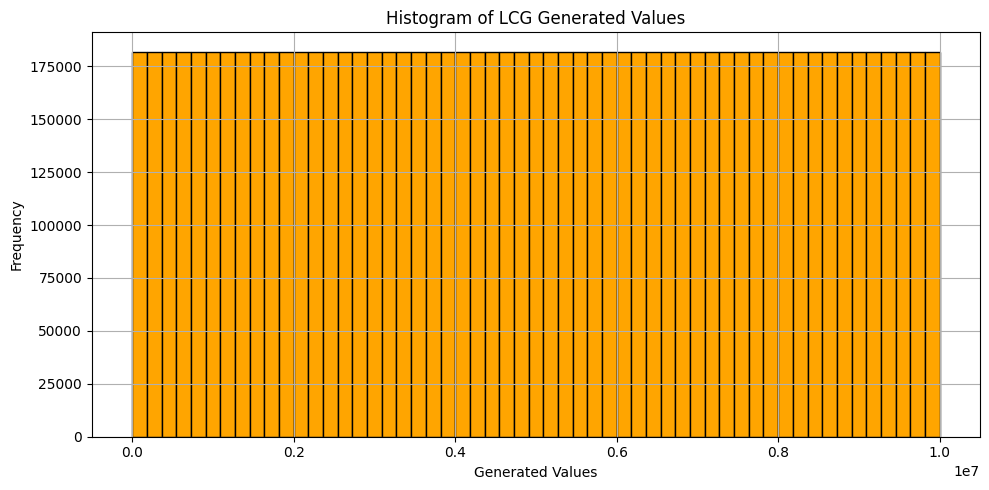

In [ ]:

import matplotlib.pyplot as plt

# TODO: plot a histogram of the generated numbers to visualize distribution
plt.figure(figsize=(10, 5))
plt.hist(a, bins=55, color='orange', edgecolor='black')
plt.title("Histogram of LCG Generated Values")
plt.xlabel("Generated Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

def compute_entropy(X): #here X is the list of prob
    X = np.asarray(X) # converts the input list X to numpy array, ie. floating point no to ensure math oper
    X = X[X > 0]   #removes any 0 or neg values as log(0) undefined leads to -inf
    probs = X / np.sum(X)  # Normalize to create a valid probabilities, divides ech value by total sum of all values
    return -np.sum(probs * np.log2(probs))#shanons entropy formula (calculation of s entropy)
    #H(X)=−∑p(x)log2p(x)

X = [1, 2, 3, 4, 5]#test i/p of relative freq of some outcomes.
print("Shannon Entropy:", compute_entropy(X))#prints final entropy value with the label



Shannon Entropy: 2.1492553971685


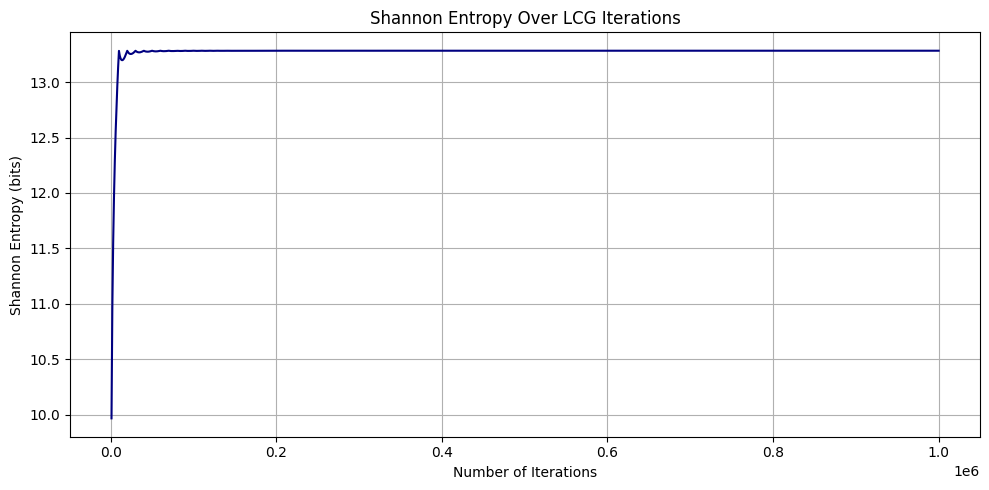

In [ ]:
# Generate sequence
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# --- Step 1: Fix a short seed value (no more than 2^10 values) ---
seed = 42  # Must be less than 1024 (2^10)

# --- LCG Parameters (should satisfy Hull-Dobell conditions for full period) ---
modulus = 9973
multiplier = 23
increment = 97

# --- Step 2 & 3: Generate LCG and compute entropy over time ---
def compute_shannon_entropy(data):
    """Compute Shannon entropy from a sequence"""
    total = len(data)
    freq = Counter(data)
    probs = np.array([count / total for count in freq.values()])
    return -np.sum(probs * np.log2(probs))

# Initialize
total_steps = 10**6
interval = 1000
sequence = []
entropies = []
steps = []

current_value = seed

# Generate LCG sequence and compute entropy at intervals
for i in range(1, total_steps + 1):
    current_value = (multiplier * current_value + increment) % modulus
    sequence.append(current_value)

    if i % interval == 0:
        entropy = compute_shannon_entropy(sequence)
        entropies.append(entropy)
        steps.append(i)

# --- Step 4: Plot Shannon Entropy over iterations ---
plt.figure(figsize=(10, 5))
plt.plot(steps, entropies, color='navy')
plt.title("Shannon Entropy Over LCG Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Shannon Entropy (bits)")
plt.grid(True)
plt.tight_layout()
plt.show()


"""
1. fix a short seed value for each LCG
(no more than 2^10 possible values for the seed)

2. Over a long LCG sequence (at least 10^6 samples),
as the generator produces values, treat the sequence of outputs
up to each step as a growing empirical distribution.

3. At regular intervals (e.g., every 1000 iterations),
compute the Shannon Entropy or Min-Entropy
of the current sample distribution.

Hint: We've already imported matplotlib for you,
though any plotting package will do the trick.
"""
#pass # TODO: Plot how the Shannon Entropy or Min-Entropy evolves with the number of iterations for each LCG configuration.

### Part B: Implement and Benchmark AES-Based PRNGs

In [ ]:
# Here is a reference implementation of the AES algorithm: https://github.com/burakozpoyraz/Advanced-Encryption-Standard/tree/master

In [ ]:
# TODO: helper function to pad/truncate the seed to 16 bytes (128 bits)
import hashlib


def pad_seed(seed_bytes, target_len=16):
    if len(seed_bytes) > target_len:
        return seed_bytes[:target_len]  # Truncate
    padding_len = target_len - len(seed_bytes)
    return seed_bytes + bytes([padding_len] * padding_len)  # Pad with PKCS#7 style


    # pass  # TODO: pad or truncate the seed appropriately

# TODO: implement a simple AES-based PRNG using ECB mode
def AES_PRNG(seed, num_bytes):
    sequence = []
     # pad seed to 16 bytes
    seed = pad_seed(seed)

    counter = 0
    while len(sequence) < num_bytes:
        # input is seed + counter as bytes
        input_block = seed + counter.to_bytes(4, 'big')

        # hash input block with SHA-256
        digest = hashlib.sha256(input_block).digest()

        # extend sequence with bytes from digest (as ints)
        sequence.extend(digest)

        counter += 1


    # truncate to requested length
        return sequence[:num_bytes]



    # pass  # TODO: implement AES-based pseudorandom generator
    # return sequence

In [ ]:
# TODO: choose at least 3 different seed lengths (e.g., 8, 16, 64 bits)
seed_lengths = [1, 2, 8]  # in bytes

# TODO: generate sequences of increasing length (10^5 to 10^7) for each seed length
sequence_lengths = [10**5, 10**6, 10**7]

In [ ]:
# Example: Generate and store sequences
all_sequences = {}

for seed_len in seed_lengths:
    seed = np.random.bytes(seed_len)
    all_sequences[seed_len] = {}

    for seq_len in sequence_lengths:
        prng_output = AES_PRNG(seed, seq_len)
        all_sequences[seed_len][seq_len] = prng_output

In [ ]:
# TODO: plot entropy across chunks of the output to study randomness
def plot_entropy(sequence, window_size=1000):
    pass  # TODO: split sequence into chunks and calculate Shannon entropy

In [26]:
# TODO: plot autocorrelation vs lag
def plot_autocorrelation(sequence, max_lag=100):
  sequence = np.array(sequence)
  n = len(sequence)
  mean = np.mean(sequence)
  var = np.var(sequence)

  autocorrs = []
  for lag in range(max_lag + 1):
      if lag == 0:
            autocorr = 1.0  # autocorrelation at lag 0 is always 1
      else:
            autocov = np.sum((sequence[:-lag] - mean) * (sequence[lag:] - mean)) / (n - lag)
            autocorr = autocov / var
      autocorrs.append(autocorr)

  plt.figure(figsize=(8, 4))
  plt.stem(range(max_lag + 1), autocorrs, use_line_collection=True)
  plt.xlabel('Lag')
  plt.ylabel('Autocorrelation')
  plt.title('Autocorrelation vs Lag')
  plt.grid(True)
  plt.show()
  pass  # TODO: compute autocorrelation for various lag values

In [2]:
import numpy as np
from scipy.stats import chisquare

# Enhanced version with debug prints
def run_statistical_tests(sequence, num_bins=50):
    print("Running statistical tests...")

    if sequence is None:
        print("Error: Sequence is None.")
        return

    if not isinstance(sequence, (list, np.ndarray)):
        print("Error: Sequence is not a list or NumPy array.")
        return

    if len(sequence) < num_bins:
        print(f"Error: Sequence too short (length {len(sequence)}), need at least {num_bins} samples.")
        return

    # Histogram the sequence into bins
    counts, bin_edges = np.histogram(sequence, bins=num_bins)
    print(f"Counts: {counts}")

    # Expected uniform count in each bin
    expected = np.full_like(counts, fill_value=np.mean(counts))

    # Run chi-squared test
    chi_stat, p_value = chisquare(f_obs=counts, f_exp=expected)

    print(f"Chi-squared Statistic: {chi_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("Sequence is likely NOT uniformly random (reject H0 at 5% level).")
    else:
        print("Sequence appears uniformly random (fail to reject H0 at 5% level).")

# Example
# Let's create a sample sequence of numbers
sample_sequence = [np.random.randint(0, 100, 1000)]

# Call the function to run the statistical test
run_statistical_tests(sample_sequence[0])


Running statistical tests...
Counts: [18 17 22 18 16 22 22 16 23 15 19 21 18 18 20 20 24 26 19 22 20 19 25 20
 23 26 28 24 19 21 24 21 23 17 18 21 25 18 18 12 19 19 18 21 13 12 24 15
 26 15]
Chi-squared Statistic: 33.7000
P-value: 0.9530
Sequence appears uniformly random (fail to reject H0 at 5% level).


### (BONUS) Part C: Breaking the Illusion of Randomness

### Bonus Task:
Train a light-weight model (small-neural net or decision tree) to predict the next number in your random number sequences generated from LCG and AES. Now try implementing at least one other more robust PRNGs from the list below:
- XOR-Shift Generator
- Permuted Congruential Generator (PCG)
- SplitMix64

In [ ]:
# You may want to import these packages, though feel free to import anything else you need
import torch
import torch.nn as nn
import torch.nn.functional as F

import tensorflow as tf
import keras

import sklearn